<a href="https://colab.research.google.com/github/shivajith/shivajith/blob/main/Team17_M3_Mini_Hackathon_Multi_Text_Classification_of_Coronavirus_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Mini Project Notebook: Multi-Text Classification of Coronavirus Tweets using Deep Neural Networks (RNNs).


## Learning Objectives

At the end of the mini-hackathon, you will be able to :

* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural network (RNN, LSTM, GRU, CNNs, Bidirectional-LSTM, GRU,BERT) to classify the tweets


### Introduction

First we need to understand why sentiment analysis is needed for social media?

People from all around the world have been using social media more than ever. Sentiment analysis on social media data helps to understand the wider public opinion about certain topics such as movies, events, politics, sports, and more and gain valuable insights from this social data. Sentiment analysis has some powerful applications. Nowadays it is also used by some businesses to do market research and understand the customer’s experiences for their products or services.

Now an interesting question about this type of problem statement that may arise in your mind is that why sentiment analysis on COVID-19 Tweets? What is about the coronavirus tweets that would be positive? You may have heard sentiment analysis on movie or book reviews, but what is the purpose of exploring and analyzing this type of data?

The use of social media for communication during the time of crisis has increased remarkably over the recent years. As mentioned above, analyzing social media data is important as it helps understand public sentiment. During the coronavirus pandemic, many people took to social media to express their anger, grief, or sadness while some also spread happiness and positivity. People also used social media to ask their network for help related to vaccines or hospitals during this hard time. Many issues related to this pandemic can also be solved if experts considered this social data. That’s the reason why analyzing this type of data is important to understand the overall issues faced by people.



## Dataset

The given challenge is to build a multiclass classification model to predict the sentiment of Covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done. We are given information like Location, Tweet At, Original Tweet, and Sentiment.

The training dataset consists of 36000 tweets and the testing dataset consists of 8955 tweets. There are 5 sentiments namely ‘Positive’, ‘Extremely Positive’, ‘Negative’, ‘Extremely Negative’, and ‘Neutral’ in the sentiment column.

## Description

This dataset has the following information about the user who tweeted:

1. **UserName:** twitter handler
2. **ScreenName:** a personal identifier on Twitter and is separate from the username
3. **Location:** where in the world the person tweets from
4. **TweetAt:** date of the tweet posted (DD-MM-YYYY)
5. **OriginalTweet:** the tweet itself
6. **Sentiment:** sentiment value



## Problem Statement

To build and implement a multiclass classification deep neural network model to classify between Positive/Extremely Positive/Negative/Extremely Negative/Neutral sentiments

## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

## Instructions for downloading train and test dataset from Kaggle API are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/6ff3f8dbf34a4a57af7eac66dded4f31) and open your user settings page. Click Account.

* Click on your profile picture at the top-right corner of the page.

![alt text](https://i.imgur.com/kSLmEj2.png)

* In the popout menu, click the Settings option.

![alt text](https://i.imgur.com/tNi6yun.png)








### 2. Next, scroll down to the API access section and click generate to download an API key (kaggle.json).
![alt text](https://i.imgur.com/vRNBgrF.png)


### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [117]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shivajithmutteal","key":"761659f5a21d78223ee76cbf17440246"}'}

In [118]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

 corona_nlp_test.csv/    min_hackathon.csv
 corona_nlp_train.csv/   model_1.h5
 drive/                  multi-text-classification-of-coronavirus-tweets.zip
 glove.840B.300d.txt     sample_data/
 glove.840B.300d.zip     sample_submission.csv
'kaggle (1).json'        Sample_Submission.csv
 kaggle.json


### 4. Install the Kaggle API using the following command


In [119]:
!pip install -U -q kaggle==1.5.8

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [120]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [121]:
# Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [122]:
!chmod 600 /root/.kaggle/kaggle.json # run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '404 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [123]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c multi-text-classification-of-coronavirus-tweets

multi-text-classification-of-coronavirus-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [124]:
!unzip /content/multi-text-classification-of-coronavirus-tweets.zip

Archive:  /content/multi-text-classification-of-coronavirus-tweets.zip
replace corona_nlp_test.csv/corona_nlp_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace corona_nlp_train.csv/corona_nlp_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## YOUR CODING STARTS FROM HERE

## Import required packages

In [125]:
!pip install contractions
!pip install -U scikit-learn

# Import required packages

# Ggeneral purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

# Data processing
import re, string
import nltk
import contractions

from sklearn import preprocessing
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

# Keras
import tensorflow as tf
from tensorflow import keras


# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Word Cloud for most common words in Tweet Visualization
from collections import Counter
from wordcloud import WordCloud

# For Data Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import wordninja


#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-125-33e9db5fdad0>:58: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

##   **Stage 1**:  Data Loading and Perform Exploratory Data Analysis (1 Points)

* Load the Dataset


In [126]:
# YOUR CODE HERE
#!ls  ../content/

data = pd.read_csv('../content/corona_nlp_train.csv/corona_nlp_train.csv',encoding='ISO-8859-1')
kaggle_test = pd.read_csv('../content/corona_nlp_test.csv/corona_nlp_test.csv',encoding='ISO-8859-1')

# df_train, df_test = train_test_split(data, random_state = 42, test_size=0.2)
df_train, df_test = train_test_split(data, random_state = 42, test_size=8955)

print(df_train.shape)
print(df_test.shape)

(27042, 6)
(8955, 6)


* Check for Missing Values

In [127]:
# YOUR CODE HERE

# print(df_train)

# Check for missing values
missing_values = df_train.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

UserName            0
ScreenName          0
Location         5702
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


* Visualize the sentiment column values


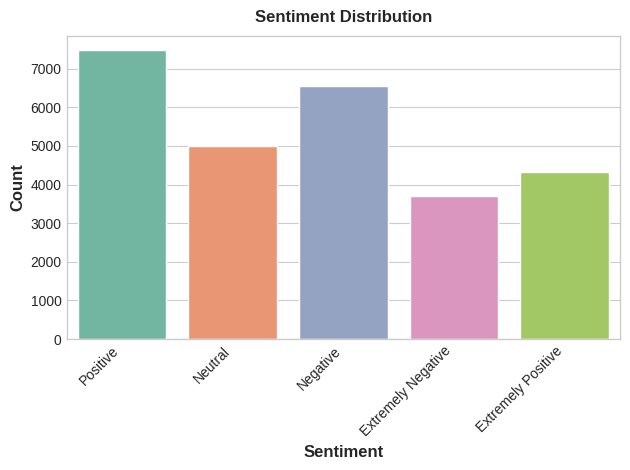

In [128]:
# YOUR CODE HERE
sns.countplot(data=df_train, x='Sentiment', palette='Set2', hue='Sentiment')
plt.xlabel('Sentiment')
plt.xticks(rotation=45, ha="right")  # Adjust the rotation angle as needed
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.tight_layout()  # Ensure labels don't overlap
plt.show()

* Visualize top 10 Countries that had the highest tweets using countplot (Tweet count vs Location)


<ipython-input-129-3e7b764f0f03>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='Location', order=top_10_locations, palette='viridis')


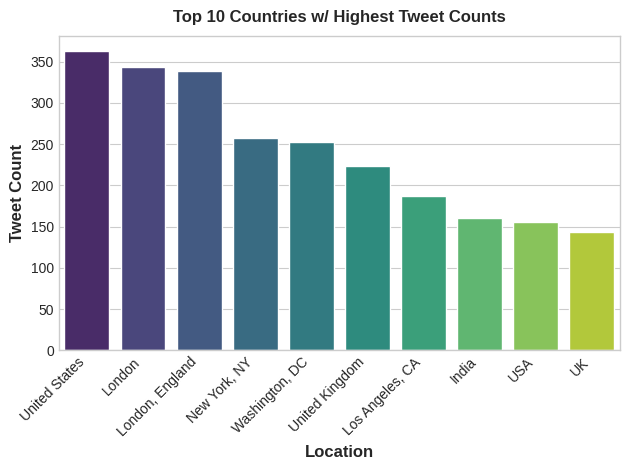

In [129]:
# YOUR CODE HERE
# Get the top 10 locations by tweet count
top_10_locations = df_train['Location'].value_counts().nlargest(10).index

sns.countplot(data=df_train, x='Location', order=top_10_locations, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Countries w/ Highest Tweet Counts')
plt.tight_layout()
plt.show()

* Plotting Pie Chart for the Sentiments in percentage


Sentiment_Value_Counts: [7474, 6545, 4988, 4334, 3701] 
 -------------------------------------------------------------------------------- 



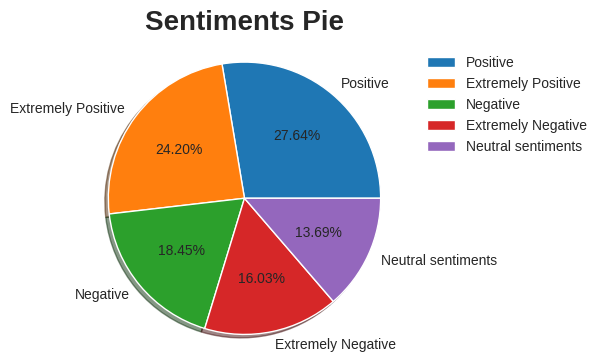

In [130]:
# YOUR CODE HERE

sentiment_count = df_train['Sentiment'].value_counts().to_list()
print("Sentiment_Value_Counts:",sentiment_count,"\n",'-' * 80,"\n")
labels=['Positive','Extremely Positive','Negative','Extremely Negative','Neutral sentiments']
plt.figure(figsize=(6,6))
plt.pie(x=sentiment_count,shadow=True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Sentiments Pie", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* WordCloud for the Tweets/Text

    * Visualize the most commonly used words in each sentiment using wordcloud
    * Refer to the following [link](https://medium.com/analytics-vidhya/word-cloud-a-text-visualization-tool-fb7348fbf502) for Word Cloud: A Text Visualization tool




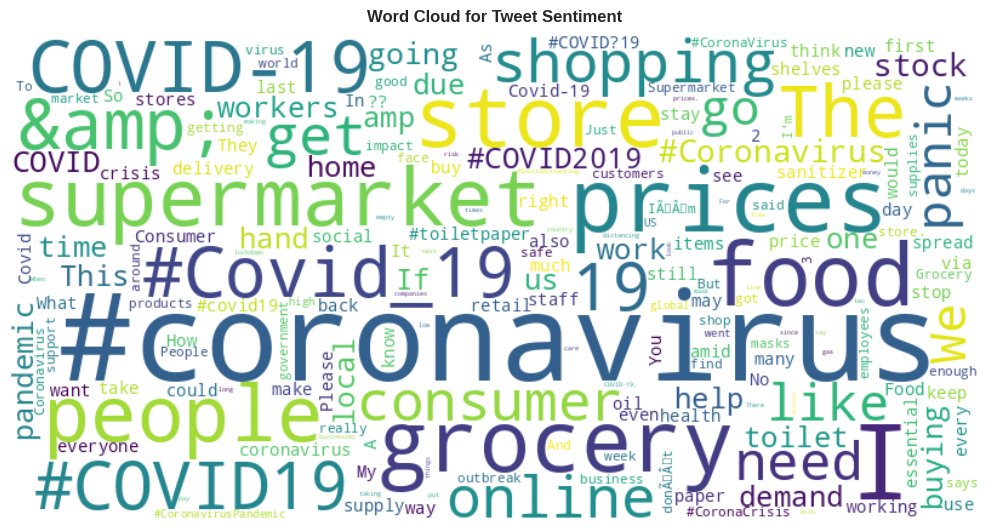

In [131]:
# YOUR CODE HERE
words = ' '.join(df_train['OriginalTweet']).split()

# Remove stopwords and punctuation so as we can view the next set of mostly used words in wordcloud
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)
words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweet Sentiment')
plt.show()

##   **Stage 2**: Data Pre-Processing  (2 Points)

####  Clean and Transform the data into a specified format


In [132]:
# YOUR CODE HERE

# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization

# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# We leveraged lemmatization below because stemming simply removes common suffixes from the end of word tokens,
# where as lemmatization ensures the output word is an existing normalized form of the word (for example, lemma) that can be found in the dictionary

def clean_tweet(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove user mentions, special characters, links
    #text = re.sub("(@[\w]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    #text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)

    # Remove User mentions, links, HashTags, digits-by-itself
    text = re.sub(r'https?:\S+', ' ', text)
    text = re.sub(r'www\.\S+', ' ', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    # Expand English language contractions. For ex: can't to cannot
    text = contractions.fix(text)

    text = re.sub(r'\s+\d+\s*\d*\s+', r' ', text)

    text = re.sub(r'covid\s*2?0?19\.?\s?', 'covid ', text)
    text = re.sub(r'coronavirus\s*2?0?1?9?', 'corona virus ', text)
    text = re.sub(r'\d*([a-zA-Z]+?)\d*', '\\1', text)
    text = re.sub(r'\d*([a-zA-Z]+)\d+([a-zA-Z]+)', '\\1 \\2', text)

    text = re.sub(r'[?|!|\'|"]',' ', text)
    text = re.sub(r'[.|,|)|(|\|/]',' ', text)
    text = re.sub(r'\\r',' ', text)
    text = re.sub(r'\\n',' ', text)

    regrex_pattern = re.compile(pattern = "["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'',text)

    #text = re.sub(r'[^0-9A-Za-z \t]', r'', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Stemming
    # ps = PorterStemmer()
    # words = [ps.stem(word) for word in words]

    # Lemmatize words
    # Lemmatization finds the base form (e.g., “better” -> “good”).
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]

    # split_word_lst = []
    # for word in words:
    #     for wrd in wordninja.split(word):
    #         split_word_lst.append(wrd)
    # words = split_word_lst

    # Join words into a string and return
    return ' '.join(words)

df_train['CleanTweet'] = df_train['OriginalTweet'].apply(clean_tweet)
df_test['CleanTweet'] = df_test['OriginalTweet'].apply(clean_tweet)
kaggle_test['CleanTweet'] = kaggle_test['OriginalTweet'].apply(clean_tweet)

df_train_final = df_train[['CleanTweet', 'Sentiment']].copy()
df_test_final = df_test[['CleanTweet']].copy()
df_kaggle_test = kaggle_test[['CleanTweet']].copy()


# Creating new dataframe
#print("Train Data:\n",df_train_final.head(20))
#print("\nTest Data:\n",df_test_final.head(40))
#df_train_final.head(50)

In [ ]:
# Word cloud to check whether Data processing is done effectively
words = ' '.join(df_train['CleanTweet']).split()
word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweet Sentiment')
plt.show()

##   **Stage 3**: Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation) (1 Point)



In [133]:
# YOUR CODE HERE

# Do not download if already done in today's trials
glove_file = "glove.840B.300d.txt"
if not os.path.isfile(glove_file):
  !wget http://nlp.stanford.edu/data/glove.840B.300d.zip
  !unzip glove.840B.300d.zip

!ls
!pwd

def load_glove_embeddings(file_path):
    word_to_vec = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = ''.join(values[:-300])
            vector = np.asarray(values[-300:], dtype='float32')
            word_to_vec[word] = vector
    return word_to_vec

glove_file = "glove.840B.300d.txt"
glove_embeddings = load_glove_embeddings(glove_file)

print("Glove Embedding size:", len(glove_embeddings))
print("Train Data size:", len(df_train_final))
print("Test Data size", len(df_test_final))

# # Access the embedding for a sample word
# word = 'success'
# if word in glove_embeddings:
#     print(f"GloVe Embedding for '{word}': {glove_embeddings[word]}")
# else:
#     print(f"GloVe Embedding for '{word}' couldn't be found")

 corona_nlp_test.csv   'kaggle (1).json'				      sample_data
 corona_nlp_train.csv   kaggle.json					      sample_submission.csv
 drive		        min_hackathon.csv				      Sample_Submission.csv
 glove.840B.300d.txt    model_1.h5
 glove.840B.300d.zip    multi-text-classification-of-coronavirus-tweets.zip
/content
Glove Embedding size: 2195892
Train Data size: 27042
Test Data size 8955


##   **Stage 4**: Build and Train the Deep Recurrent Model using Pytorch/Keras (4 Points)



In [134]:
# YOUR CODE HERE

# Tokenize Text: involves converting each sequence into an integer encoded represenation and normalizing the length of the sequences.

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

t = Tokenizer()
combined_df = pd.concat([df_train_final['CleanTweet'], df_test_final['CleanTweet']])
print(f"length of df train:{len(df_train_final)}")
print(f"length of df test:{len(df_test_final)}")
print(f"length of combined df:{len(combined_df)}")

#t.fit_on_texts(df_train_final.CleanTweet)
t.fit_on_texts(combined_df)
vocab_size = len(t.word_index) + 1

# Training constants
# MAX_SEQ_LEN = df_train_final.CleanTweet.apply(lambda x: len(x.split())).max()
MAX_SEQ_LEN = int(df_train_final.CleanTweet.apply(lambda x : len(x.split(' '))).quantile(0.96))
DEFAULT_BATCH_SIZE = 128

#encoded_tweets = t.texts_to_sequences(df_train_final['CleanTweet'])
#padded_tweets = pad_sequences(encoded_tweets, maxlen=MAX_SEQ_LEN, padding='post')
X_train = pad_sequences(t.texts_to_sequences(df_train_final.CleanTweet), maxlen = MAX_SEQ_LEN, padding='post')
X_test = pad_sequences(t.texts_to_sequences(df_test_final.CleanTweet), maxlen = MAX_SEQ_LEN, padding='post')
Kaggle_test = pad_sequences(t.texts_to_sequences(df_kaggle_test.CleanTweet), maxlen = MAX_SEQ_LEN, padding='post')

print("Vocabulary Size :", vocab_size)
print("Word Index : ",t.word_index)
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("Kaggle_test Shape:",Kaggle_test.shape)
#print(X_train)

length of df train:27042
length of df test:8955
length of combined df:35997
Vocabulary Size : 26921
Word Index :  {'store': 1, 'price': 2, 'food': 3, 'supermarket': 4, 'grocery': 5, 'people': 6, 'amp': 7, 'consumer': 8, 'shopping': 9, 'online': 10, 'need': 11, 'virus': 12, 'time': 13, 'get': 14, 'covid': 15, 'stock': 16, 'worker': 17, 'panic': 18, 'pandemic': 19, 'hand': 20, 'go': 21, 'u': 22, 'like': 23, 'corona': 24, 'home': 25, 'going': 26, 'demand': 27, 'help': 28, 'one': 29, 'supply': 30, 'sanitizer': 31, 'day': 32, 'work': 33, 'due': 34, 'buying': 35, 'please': 36, 'week': 37, 'toilet': 38, 'mask': 39, 'paper': 40, 'new': 41, 'local': 42, 'crisis': 43, 'shelf': 44, 'make': 45, 'buy': 46, 'today': 47, 'oil': 48, 'good': 49, 'business': 50, 'stay': 51, 'shop': 52, 'delivery': 53, 'keep': 54, 'market': 55, 'would': 56, 'still': 57, 'many': 58, 'see': 59, 'take': 60, 'via': 61, 'say': 62, 'know': 63, 'essential': 64, 'retail': 65, 'everyone': 66, 'stop': 67, 'way': 68, 'customer': 69

In [135]:
# Label Encoding with Scikit-Learn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.utils import class_weight

label_encoder = LabelEncoder()
# Fit and transform the labels
y_train = label_encoder.fit_transform(df_train['Sentiment'].values)
unique_classes = np.unique(y_train)
print(f"y_train: {y_train}. Lenght: {len(y_train)}")
print(f"unique_classes: {unique_classes}")

y_test = label_encoder.fit_transform(df_test['Sentiment'].values)
print(f"y_test: {y_test}. Lenght: {len(y_test)}")

# Get an idea of the distribution of the text values
from collections import Counter
class_distribution = Counter(df_train['Sentiment'].values)
print('Distribution of classes:', class_distribution)

# In multiclass classification problems, class weights play a crucial role in addressing class imbalance
# Without class weights, the model may struggle to predict minority classes accurately
# cws = class_weight.compute_class_weight(class_weight="balanced", classes=unique_classes, y=y_train)
# print(f"Class Weights(CWS):{cws}")

print('Dominant Class: ', class_distribution.most_common(n = 1)[0][0])
print('Baseline Accuracy Dominant Class', (class_distribution.most_common(n = 1)[0][0] == df_train['Sentiment'].values).mean())

y_train: [4 4 3 ... 2 4 1]. Lenght: 27042
unique_classes: [0 1 2 3 4]
y_test: [1 2 4 ... 2 2 2]. Lenght: 8955
Distribution of classes: Counter({'Positive': 7474, 'Negative': 6545, 'Neutral': 4988, 'Extremely Positive': 4334, 'Extremely Negative': 3701})
Dominant Class:  Positive
Baseline Accuracy Dominant Class 0.27638488277494266


In [136]:
# Create a weight matrix
cntr = 0
not_orig_cntr = 0
not_orginal_word_lst = []
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in t.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
        else:
            cntr += 1
            # print(f"Embedding vector for '{word}' couldn't be found. Cntr:{cntr}")
            if df_train['OriginalTweet'].str.contains(word).any():
                not_orig_cntr += 1
                not_orginal_word_lst.append(word)

print(f"{not_orig_cntr} words not in Orig Tweet:{not_orginal_word_lst}")

945 words not in Orig Tweet:['covid', 'icymi', 'brexit', 'fauci', 'venmo', 'instacart', 'stockpilers', 'cashapp', 'adoting', 'coronovirus', 'mintel', 'pricegouging', 'nessel', 'deliveroo', 'stockup', 'doordash', 'gtbank', 'retailgazette', 'grubhub', 'santizers', 'bamyglobal', 'tsla', 'daraz', 'naivas', 'labreports', 'oeb', 'pacp', 'andme', 'paswan', 'santizer', 'keyworkers', 'khoelcher', 'makinde', 'coronvirus', 'kolonya', 'reynders', 'bamy', '08028611855', 'bigbasket', 'remdesivir', 'handgel', 'andrex', 'amazonsmile', 'adityanath', 'gofundme', 'ramaphosa', 'tcpa', 'handwashes', 'lyft', 'ayuk', 'findom', 'poitin', 'pendamic', 'oaps', 'covi', 'heijn', 'tuskys', 'namaka', 'ilorin', 'bogroll', 'myus', '0715783634', 'baringo', 'mnfrg', 'distrbtn', 'ojiwulila', 'redvelvet', 'achanak', 'pymnts', 'hamsterk', 'costcos', 'hospo', 'uchumi', 'geekwire', 'supermark', 'khopoli', 'qurantine', 'ugx', 'stayathome', 'ypo', 'lrw', 'homeneeds', 'wazwan', 'chowmin', 'plcb', 'makoya', 'moph', 'patreon', 'e

In [137]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from google.colab import drive
drive.mount('/content/drive')

print(f"MAX_SEQ_LEN: '{MAX_SEQ_LEN}'")
print(f"vocab_size: '{len(t.word_counts) + 1}'")

def train(model,
          X_train, y_train, X_test, y_test,
          checkpoint_path='model.hdf5',
          epcohs = 25,
          # batch_size = DEFAULT_BATCH_SIZE,
          batch_size = 78,
          class_weights = None,
          fit_verbose=2,
          print_summary = True
         ):
    m = model()
    if print_summary:
        print(m.summary())
    m.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=epcohs,
        batch_size=batch_size,
        class_weight=class_weights,
        # saves the most accurate model, usually you would save the one with the lowest loss
        callbacks= [
            ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True),
            EarlyStopping(patience = 2)
        ],
        verbose=fit_verbose
    )
    print('\n\nLoading the best Model...')
    m.load_weights(checkpoint_path)
    # predictions = m.predict(X_test, verbose=1)
    predictions = m.predict(Kaggle_test, verbose=1)
    class_predictions = np.argmax(predictions, axis=-1)

    # # Below block valid only for Test data with O/P labels
    # # log_loss(["spam", "ham", "ham", "spam"], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])
    # print('Validation Loss:', log_loss(y_test, predictions))
    # # print(f"class_predictions == y_test:{class_predictions == y_test}") # => [ True  True False ...  True  True  True]
    # print('Test Accuracy', (class_predictions == y_test).mean())
    # print('F1 Score:', f1_score(y_test, class_predictions, average='weighted'))

    # Creating Kaggle Submission file sample_submission.csv
    print("\nDumping model's prediction file for kaagle submission /content/drive/My Drive//Colab Notebooks/mini_hackathon.csv")
    test_id = []
    cntr = 1
    decoded_sentiments = label_encoder.inverse_transform(class_predictions)
    for index in decoded_sentiments:
        test_id.append(cntr)
        cntr += 1
    submit_data = {
        'Test_Id': np.array(test_id),
        'Sentiment': np.array(decoded_sentiments),
    }
    df_predictions = pd.DataFrame(submit_data)
    df_predictions.to_csv('/content/drive/My Drive//Colab Notebooks/Sample_Submission.csv', index=False)
    print('Done! Happy Submission!')
    return m #returns best performing model

MAX_SEQ_LEN: '27'
vocab_size: '26921'
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##   **Stage 5**: Evaluate the Model and get model predictions on the test dataset (2 Points)

* Upload the model predictions to kaggle by mapping the sentiment column vlalues from numericals the categorical







In [138]:
def model_1():
    model = Sequential()
    model.add(Embedding(input_dim = (len(t.word_counts) + 1), output_dim = 128, input_length = MAX_SEQ_LEN))
    model.add(LSTM(128))
    model.add(Dense(64, activation='relu'))
    # The model will produce 5 probabilities (summing to 1) for each input sample, representing the likelihood of belonging to each class.
    model.add(Dense(5, activation='softmax'))
    # Since your training data output labels are integers (not one-hot encoded), using SparseCategoricalCrossentropy aligns with your setup.
    # The model will internally handle the conversion from integer labels to probabilities during training
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])
    return model

def model_2():
    model = Sequential()
    model.add(Embedding(input_dim = (len(t.word_counts) + 1), output_dim = 128, input_length = MAX_SEQ_LEN))
    model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])
    return model

m1 = train(model_2,
           X_train,
           y_train,
           X_test,
           y_test,
           checkpoint_path='model_1.h5'
           #class_weights=cws
          )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 27, 128)           3445888   
                                                                 
 spatial_dropout1d_3 (Spati  (None, 27, 128)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 5)                 325       
                                                                 
Total params: 3725829 (14.21 MB)
Trainable params: 372

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


347/347 - 295s - loss: 1.1889 - accuracy: 0.4890 - val_loss: 0.8827 - val_accuracy: 0.6533 - 295s/epoch - 851ms/step
Epoch 2/25

Epoch 2: val_accuracy improved from 0.65327 to 0.72138, saving model to model_1.h5
347/347 - 264s - loss: 0.7214 - accuracy: 0.7321 - val_loss: 0.7510 - val_accuracy: 0.7214 - 264s/epoch - 762ms/step
Epoch 3/25

Epoch 3: val_accuracy improved from 0.72138 to 0.73043, saving model to model_1.h5
347/347 - 262s - loss: 0.5451 - accuracy: 0.8091 - val_loss: 0.7481 - val_accuracy: 0.7304 - 262s/epoch - 754ms/step
Epoch 4/25

Epoch 4: val_accuracy did not improve from 0.73043
347/347 - 285s - loss: 0.4419 - accuracy: 0.8505 - val_loss: 0.8043 - val_accuracy: 0.7214 - 285s/epoch - 823ms/step
Epoch 5/25

Epoch 5: val_accuracy did not improve from 0.73043
347/347 - 270s - loss: 0.3639 - accuracy: 0.8806 - val_loss: 0.8926 - val_accuracy: 0.7126 - 270s/epoch - 779ms/step
Loading the best Model...
280/280 [==============================] - 37s 128ms/step
Dumping model's

### Instructions for preparing Kaggle competition predictions


* Get the predictions using trained model and prepare a csv file
    * DeepNet model gives output for each class, consider the maximum value among all classes as prediction using `np.argmax`.

* Predictions (csv) file should contain 2 columns as Sample_Submission.csv
  - First column is the Test_Id which is considered as index
  - Second column is prediction in decoded form (for eg. Positive, Negative etc...).